<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/SingularSpectrumAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This example is to applied **Singular Spectrum Analysis **(SSA) to decomposition signal from noise

### Install pyts package

In [ ]:
!pip install pyts

     |████████████████████████████████| 2.5 MB 5.2 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

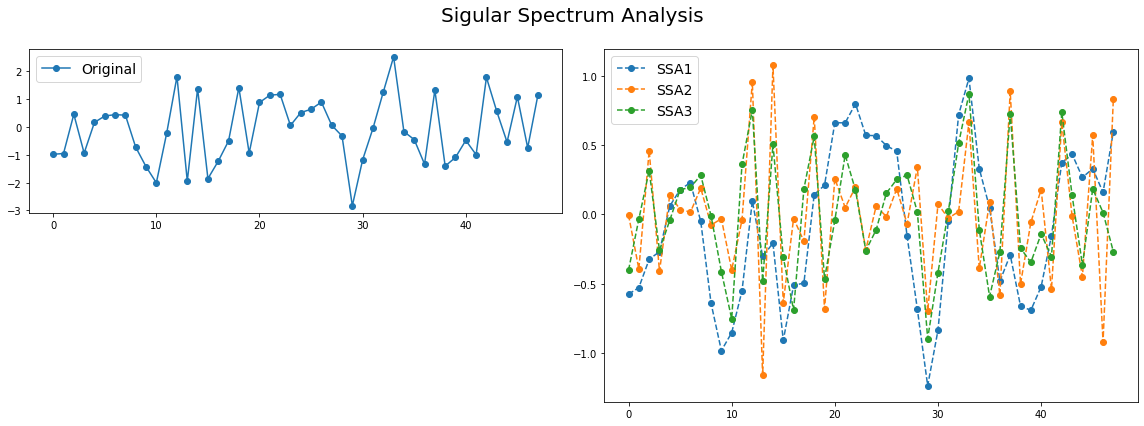

In [ ]:
# Parameters
n_samples, n_timestamps = 100, 48

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# decompose the time series into three subseries
window_size = 25 #15
groups = [np.arange(i, i+5) for i in range(0, 21, 5)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=3, groups=None)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries 
plt.figure(figsize= (16, 6))

ax1 = plt.subplot(221)
ax1.plot(X[1], 'o-', label = 'Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)-2):
  ax2.plot(X_ssa[1, i], 'o--', label='SSA{0}'.format(i+1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Sigular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


In [ ]:
len(groups)

5

In [ ]:
groups

In [ ]:
X[1]

array([-0.98520304, -0.95836832,  0.44910865, -0.94246256,  0.15890945,
        0.38807562,  0.43733776,  0.41822955, -0.73218499, -1.42828297,
       -2.00921735, -0.23343958,  1.80395237, -1.94867066,  1.36785101,
       -1.85873942, -1.23395073, -0.50756976,  1.4071715 , -0.94109705,
        0.87350473,  1.13510019,  1.1659844 ,  0.04921449,  0.51094674,
        0.63129939,  0.88770207,  0.05765164, -0.32954444, -2.83207869,
       -1.18255366, -0.05484602,  1.24835183,  2.51034292, -0.17133646,
       -0.45805514, -1.33878152,  1.32006292, -1.40932928, -1.09829722,
       -0.48675106, -1.00097056,  1.77387679,  0.55578305, -0.54871197,
        1.08001575, -0.75243358,  1.15879497])

## Analysis PPG singal with Motion Artifact

In [ ]:
import os

path = 'drive/Shareddrives/AIOT_LAB_DOCS/Data/'
files = os.listdir('/content/'+path)
files

['DATA_02_TYPE02_BPMtrace.mat',
 'DATA_03_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02_BPMtrace.mat',
 'DATA_05_TYPE02_BPMtrace.mat',
 'DATA_06_TYPE02_BPMtrace.mat',
 'DATA_07_TYPE02_BPMtrace.mat',
 'DATA_08_TYPE02_BPMtrace.mat',
 'DATA_10_TYPE02_BPMtrace.mat',
 'DATA_09_TYPE02_BPMtrace.mat',
 'DATA_11_TYPE02_BPMtrace.mat',
 'DATA_01_TYPE01_BPMtrace.mat',
 'DATA_12_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02.mat',
 'DATA_05_TYPE02.mat',
 'DATA_01_TYPE01.mat',
 'DATA_06_TYPE02.mat',
 'DATA_03_TYPE02.mat',
 'DATA_11_TYPE02.mat',
 'DATA_12_TYPE02.mat',
 'DATA_07_TYPE02.mat',
 'DATA_02_TYPE02.mat',
 'DATA_08_TYPE02.mat',
 'DATA_10_TYPE02.mat',
 'DATA_09_TYPE02.mat',
 'TrainSubj1',
 'TrainSubj2',
 'TrainSubj3',
 'TrainSubj4',
 'TrainSubj5',
 'TrainSubj6',
 'TrainSubj7',
 'TrainSubj8',
 'TrainSubj9',
 'TrainSubj10',
 'TrainSubj11',
 'TrainSubj12',
 'resultsS0.pickle',
 'resultsS1.pickle',
 'resultsS2.pickle',
 'my_first_model.png',
 'resultsS4.pickle',
 'resultsS5.pickle',
 'resultsS7.pickle',
 'result

In [ ]:
import pandas as pd
from pathlib import Path

import scipy.io as sio
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Xscaled = scaler.fit_transform(dfs[1])

def read_folder(mat_folder, HR = False):
    ''' Input is a folder with csv files; return list of data frames.'''
    mat_folder = Path(mat_folder).absolute()
    if HR == False:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and not('BPMtrace' in f.name)]
      # Sorting name in order
      mat_files = sorted(mat_files)
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(scaler.fit_transform(pd.DataFrame(sio.loadmat(mat_file)['sig']).T)).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    else:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and ('BPMtrace' in f.name)] 
      # Sorting name in order
      mat_files = sorted(mat_files)
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(pd.DataFrame(sio.loadmat(mat_file)['BPM0'])).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    #data = scaler.fit_transform(sio.loadmat(csv_file)['sig'])
    # the assign() method adds a helper column rating
    
    return mat_files, dfs

In [ ]:
parent_path ='/content/'+path
mat_files, dfs = read_folder(parent_path)

In [ ]:
mat_files

[PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_01_TYPE01.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_02_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_03_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_04_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_05_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_06_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_07_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_08_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_09_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_10_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_11_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_12_TYPE02.mat')]

### Prepare data
* Segment dataset into M part, each part 1000 samples and Step is 250


In [ ]:
def segment(dataframe, step=250, dis=1000):
  #dis = 1000 # 8 seconds
  #step = 250 # 2 seconds
  a= []
  for df in dataframe:
    N = np.shape(df)[0]
    temp = [df.iloc[(i*step):(i*step + dis)] for i in range(0,int(N/step)-3)]
    for ele in temp:
      a.append(ele)
  return a

### Segment the first subject data

In [ ]:
dfseg = segment(dfs[0:1])

In [ ]:
np.shape(dfseg)

(148, 1000, 7)

### Singular Spectrum Analysis

Extracting the PPG 1 of subject 1

In [ ]:
X = []
for i in range(0,np.shape(dfseg)[0]):
  X.append(dfseg[i][1].values) # PPG 1
  
#print(seg['Subject'][0])
X = np.array(X) 


#### Partion subX (Xs)

In [ ]:
 L = 400  #(L < M/2)
 M = 1000
 K = M - L 
 Xs = [X[0][i:i+K] for i in range(0, L)]
 

In [ ]:
Xs[399][-1:]

array([0.71135062])

In [ ]:
np.shape(Xs)[0], np.shape(Xs)[1]

(400, 600)

In [ ]:
 np.shape(X)[0], np.shape(X)[1]

(148, 1000)

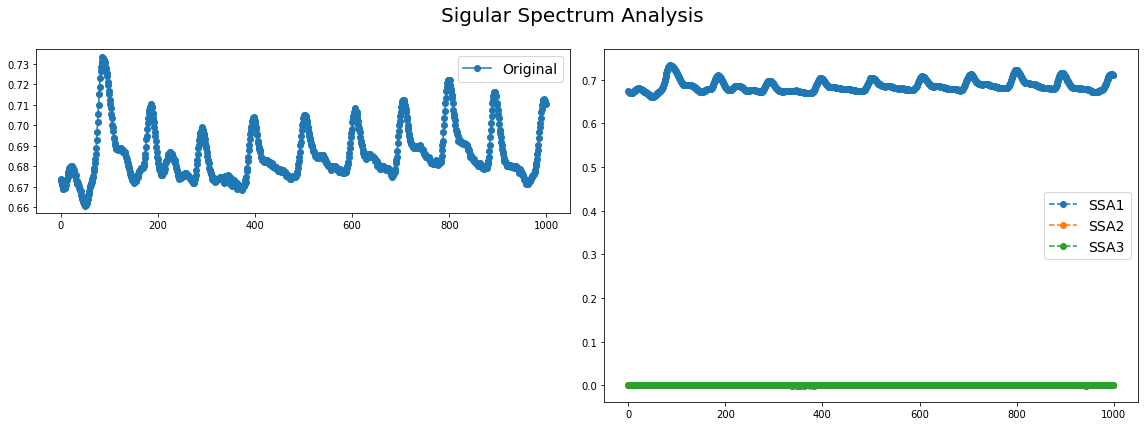

In [ ]:


# Parameters
n_samples, n_timestamps = np.shape(X)[0], np.shape(X)[1]


# decompose the time series into three subseries
window_size = 15 #15
groups = [np.arange(i, i+5) for i in range(0, 11, 5)]

# Singular Spectrum Analysis
#ssa = SingularSpectrumAnalysis(window_size=window_size, groups=groups)
ssa = SingularSpectrumAnalysis(window_size=15, groups= groups)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries 
plt.figure(figsize= (16, 6))

ax1 = plt.subplot(221)
ax1.plot(X[0], 'o-', label = 'Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
  ax2.plot(X_ssa[0, i], 'o--', label='SSA{0}'.format(i+1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Sigular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

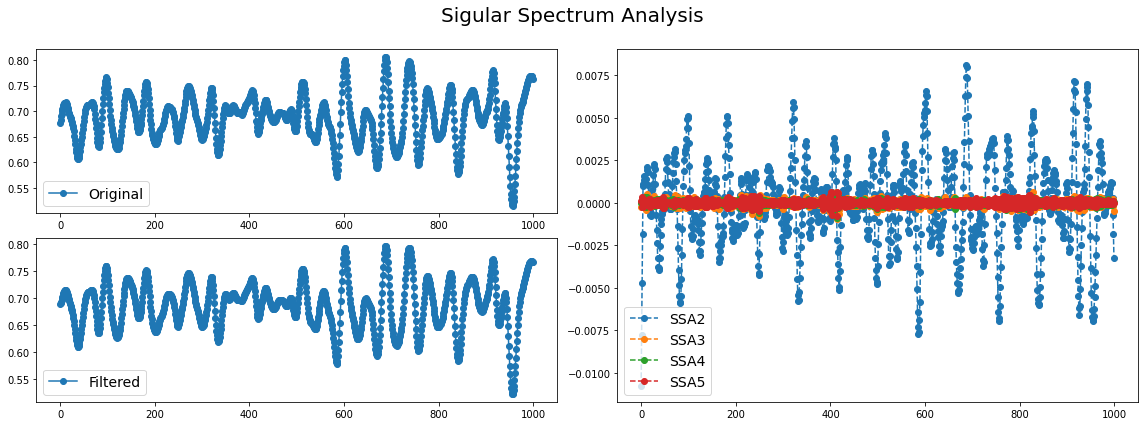

In [ ]:
# Show the results for the first time series and its subseries 
plt.figure(figsize= (16, 6))
k=125
ax1 = plt.subplot(221)
ax1.plot(X[k], 'o-', label = 'Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(223)
ax2.plot(X_ssa[k, 0], 'o-', label = 'Filtered')
ax2.legend(loc='best', fontsize=14)


ax3 = plt.subplot(122)
for i in range(1,5):#len(groups)
  ax3.plot(X_ssa[k, i], 'o--', label='SSA{0}'.format(i+1))
ax3.legend(loc='best', fontsize=14)

plt.suptitle('Sigular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [ ]:
from pyts.datasets import load_gunpoint
from pyts.decomposition import SingularSpectrumAnalysis
X, _, _, _ = load_gunpoint(return_X_y=True)
transformer = SingularSpectrumAnalysis(window_size=7)
X_new = transformer.transform(X)
X_new.shape

(50, 7, 150)

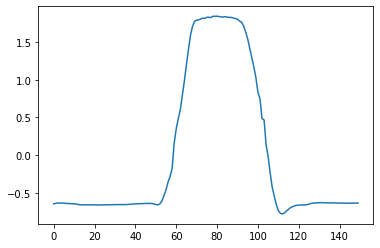

In [ ]:
plt.plot(X[0])

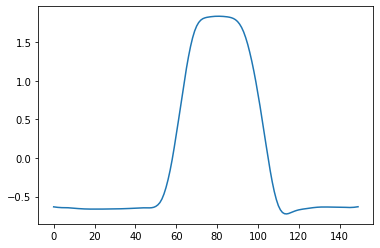

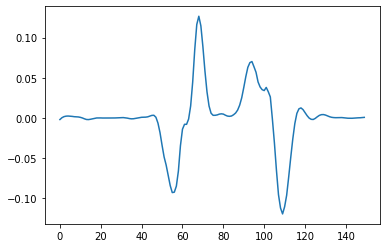

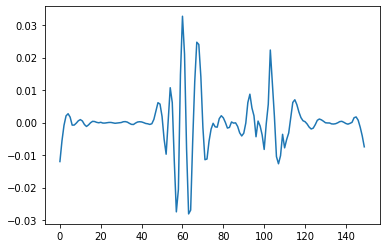

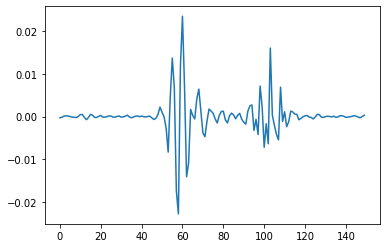

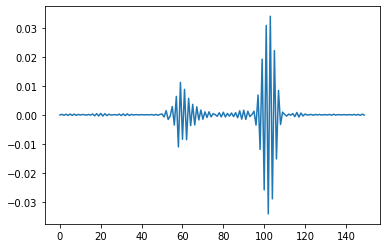

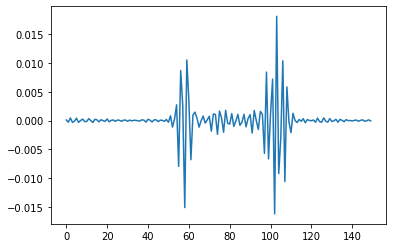

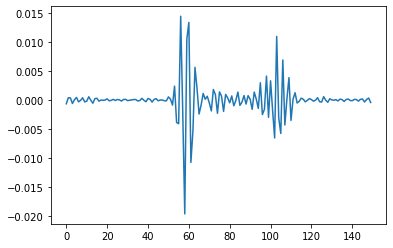

In [ ]:
for i in range(7):
  plt.figure()
  plt.plot(X_new[0][i])

In [ ]:
X[0], X[1]